In [104]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
from torch import Tensor
import torch
import ipywidgets
import math
import matplotlib as mplot
import seaborn as sns
import time
import tqdm

In [106]:
num_param_selector = ipywidgets.Text()
num_param_selector

Text(value='')

In [305]:
num_params = int(num_param_selector.value)
num_params

4

In [306]:
rng = torch.Generator()
rng.manual_seed(980856756)
func_params = torch.randn(num_params, generator=rng)
func_params

tensor([-1.0473, -0.9675, -0.3490, -0.1852])

In [307]:
def target_func(x,f_params=func_params):
    exp = torch.arange(start=f_params.size()[0]-1, end=-1, step=-1)
    return torch.sum(torch.pow(x.unsqueeze(1), exp)*f_params, dim=1)

In [308]:
def weighted_input(w, b, x):
    return w.unsqueeze(1)*x + b.unsqueeze(1)

In [325]:
def estimate(w, b, x):
    z = weighted_input(w, b, x)
    return torch.sum(torch.sigmoid(z), dim=0)

<IPython.core.display.Javascript object>


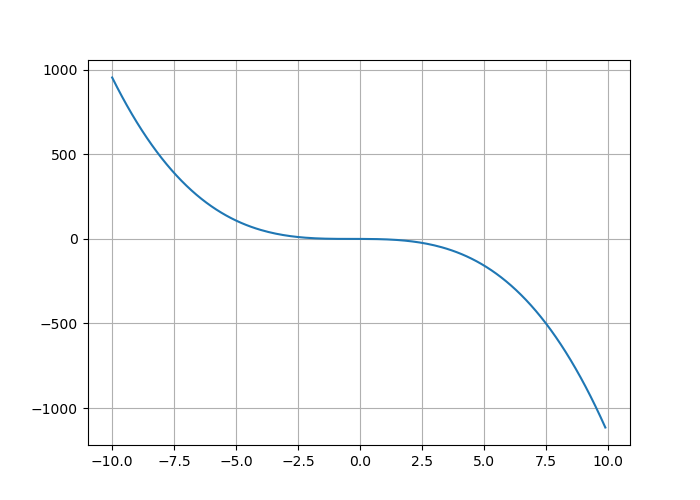

In [326]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = target_func(x)
y_lims = [y.min().item(), y.max().item()]
axes.plot(x, y)
mplot.pyplot.grid(b=True)

mplot.pyplot.show()

In [424]:
rng = torch.Generator()
rng.manual_seed(9898797)
weights = -1*torch.randn(1, generator=rng)
weights.requires_grad_()

bias = torch.randn(1, generator=rng)
bias.requires_grad_()

weights, bias

(tensor([0.7334], requires_grad=True), tensor([2.0636], requires_grad=True))

In [400]:
err_func = torch.nn.MSELoss()
learning_rate = [0.05][min(degrees, 0)]
learning_rate

0.05

In [401]:
valid_x = Tensor([i/10 for i in range(-50, 50, 1)])
valid_y = torch.sigmoidtarget_func(valid_x))

SyntaxError: unmatched ')' (3748679284.py, line 2)

<IPython.core.display.Javascript object>


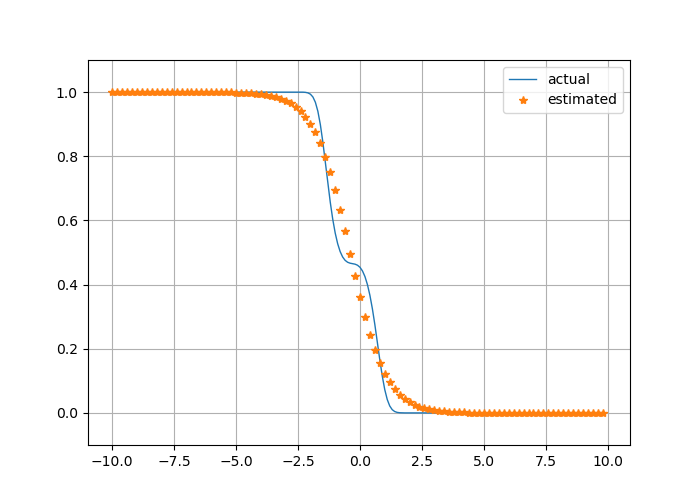

In [402]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = torch.sigmoid(target_func(x))

e_y = estimate(weights.data, bias.data, x[::2])

axes.set_ylim(-0.1, 1.1)

axes.plot(x, y, label='actual', linewidth=1)
plot1,  = axes.plot(x[::2], e_y, label='estimated', linestyle='', marker='*')
mplot.pyplot.grid(b=True)
mplot.pyplot.legend(['actual', 'estimated'])
mplot.pyplot.show()

In [403]:
N = 20_000
step_sz = N/1_000
next_update = step_sz
pbar = tqdm.notebook.tqdm(total=N, leave=False)

for i in range(0, N):
    est_y = estimate(weights, bias, valid_x)
    err = err_func(est_y, valid_y)
    err.backward()
        
    weights.data = weights.data - learning_rate*weights.grad.data    
    weights.grad = None    
        
    bias.data = bias.data - learning_rate*bias.grad.data
    bias.grad = None    
    
    pbar.update(1)
    
    if i >= next_update:
        e_y = estimate(weights.data, bias.data, x[::2])
        plot1.set_ydata(e_y)    
        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(0.05)
        
        next_update += step_sz
    
pbar.close()    
print(weights.data, bias.data, err.item())

  0%|          | 0/20000 [00:00<?, ?it/s]

tensor([-1.3941]) tensor([-0.5717]) 0.003107005963101983


<IPython.core.display.Javascript object>


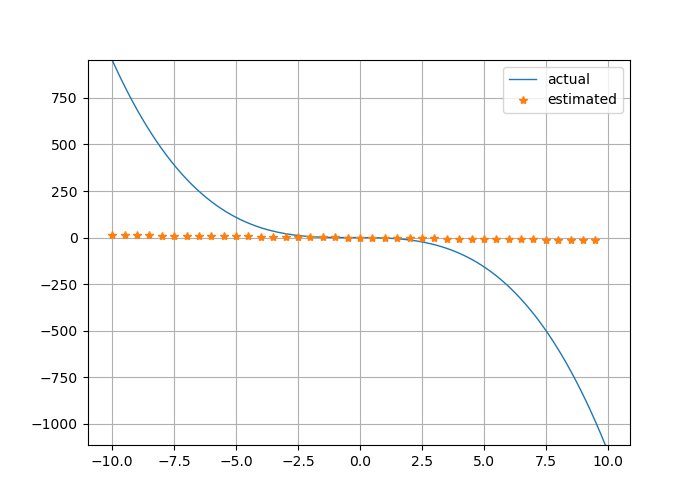

In [404]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = target_func(x)

z = estimate(weights.data, bias.data, x[::5])
e_y = torch.log(z/(1-z))

axes.set_ylim(min(y), max(y))

axes.plot(x, y, label='actual', linewidth=1)
plot1,  = axes.plot(x[::5], e_y, label='estimated', linestyle='', marker='*')
mplot.pyplot.grid(b=True)
mplot.pyplot.legend(['actual', 'estimated'])
mplot.pyplot.show()

#### ------ 10 sigmoids

In [425]:
rng = torch.Generator()
rng.manual_seed(9898797)
weights = -1*torch.randn(10, generator=rng)
weights.requires_grad_()

bias = torch.randn(10, generator=rng)
bias.requires_grad_()

weights, bias

(tensor([ 0.7334, -2.0636, -0.0428,  1.2665, -0.5696, -1.4258,  1.6044, -0.2405,
          0.8462, -0.8298], requires_grad=True),
 tensor([-2.2513, -0.4725, -0.0436, -0.9252,  0.2507,  0.7812, -0.1186,  1.4305,
         -0.3983,  1.8023], requires_grad=True))

In [426]:
err_func = torch.nn.L1Loss()
learning_rate = [0.5][min(degrees, 0)]
learning_rate

0.5

In [427]:
valid_x = Tensor([i/10 for i in range(-50, 50, 1)])
valid_y = torch.sigmoid(target_func(valid_x))

<IPython.core.display.Javascript object>


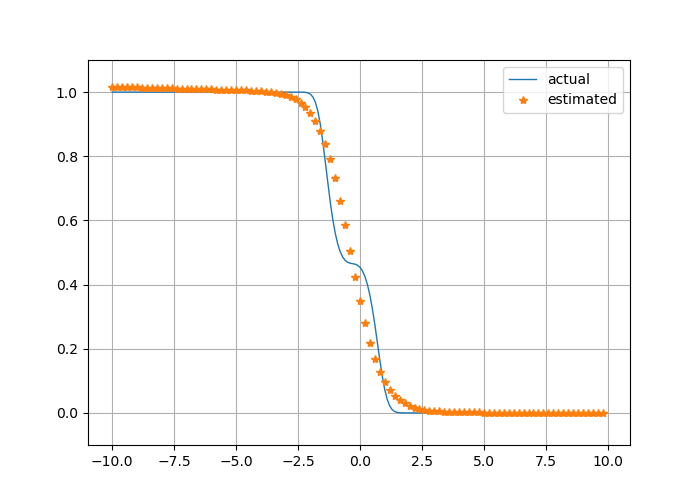

In [428]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = torch.sigmoid(target_func(x))

e_y = estimate(weights.data, bias.data, x[::2])

axes.set_ylim(-0.1, 1.1)

axes.plot(x, y, label='actual', linewidth=1)
plot1,  = axes.plot(x[::2], e_y, label='estimated', linestyle='', marker='*')
mplot.pyplot.grid(b=True)
mplot.pyplot.legend(['actual', 'estimated'])
mplot.pyplot.show()

In [430]:
N = 20_000
step_sz = N/1_000
next_update = step_sz
pbar = tqdm.notebook.tqdm(total=N, leave=False)

for i in range(0, N):
    est_y = estimate(weights, bias, valid_x)    
    err = err_func(est_y, valid_y)
    err.backward()
        
    weights.data = weights.data - learning_rate*weights.grad.data    
    weights.grad = None    
        
    bias.data = bias.data - learning_rate*bias.grad.data
    bias.grad = None    
    
    pbar.update(1)
    
    if i >= next_update:
        e_y = estimate(weights.data, bias.data, x[::2])
        plot1.set_ydata(e_y)    
        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(0.05)
        
        next_update += step_sz
    
pbar.close()    
print(weights.data, bias.data, err.item())

  0%|          | 0/20000 [00:00<?, ?it/s]

tensor([-0.1834, -0.1835, -0.1834, -0.1834, -0.1834, -0.1835, -0.1835, -0.1835,
        -0.1834, -1.6188]) tensor([-8.0900, -8.0813, -8.0856, -8.0859, -8.0845, -8.0774, -8.0820, -8.0788,
        -8.0854, -0.6371]) 0.0364040844142437


<IPython.core.display.Javascript object>


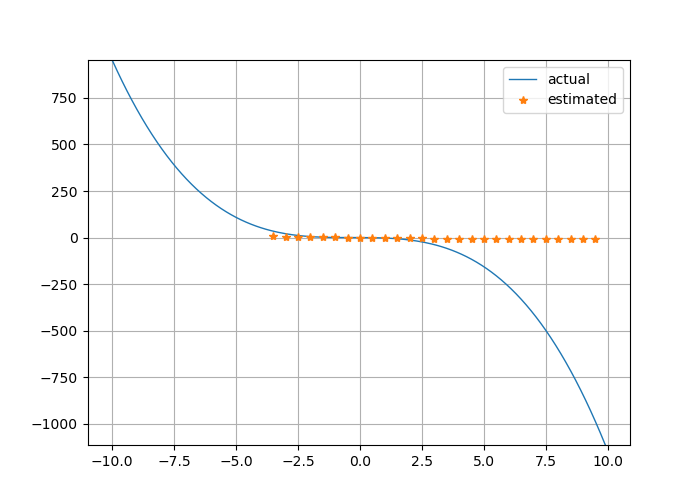

In [388]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = target_func(x)

z = estimate(weights.data, bias.data, x[::5])
e_y = torch.log(z/(1-z))

axes.set_ylim(min(y), max(y))

axes.plot(x, y, label='actual', linewidth=1)
plot1,  = axes.plot(x[::5], e_y, label='estimated', linestyle='', marker='*')
mplot.pyplot.grid(b=True)
mplot.pyplot.legend(['actual', 'estimated'])
mplot.pyplot.show()

In [389]:
z/(1-z)

tensor([-6.2888e+01, -7.0503e+01, -7.9060e+01, -8.8681e+01, -9.9501e+01,
        -1.1170e+02, -1.2551e+02, -1.4136e+02, -1.6012e+02, -1.8409e+02,
        -2.2042e+02, -2.9867e+02, -7.1804e+02,  4.1549e+02,  9.5143e+01,
         3.5021e+01,  1.4398e+01,  6.1418e+00,  2.6563e+00,  1.1552e+00,
         5.0386e-01,  2.2030e-01,  9.6680e-02,  4.2722e-02,  1.9135e-02,
         8.7942e-03,  4.2356e-03,  2.2037e-03,  1.2784e-03,  8.3993e-04,
         6.1767e-04,  4.9309e-04,  4.1416e-04,  3.5783e-04,  3.1378e-04,
         2.7723e-04,  2.4585e-04,  2.1842e-04,  1.9423e-04,  1.7280e-04])